In [4]:
%pip install pandas matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a1/27/8a807464b0cf47fdf3ba8cbb542d4f3a551da0254d7588667857f8a8a88a/matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ea/69/89f4bb69e28bb293b95abb0a66d49a841580451a584adb1aba59f39b6dff/fonttools-4.49.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.3 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Alex\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


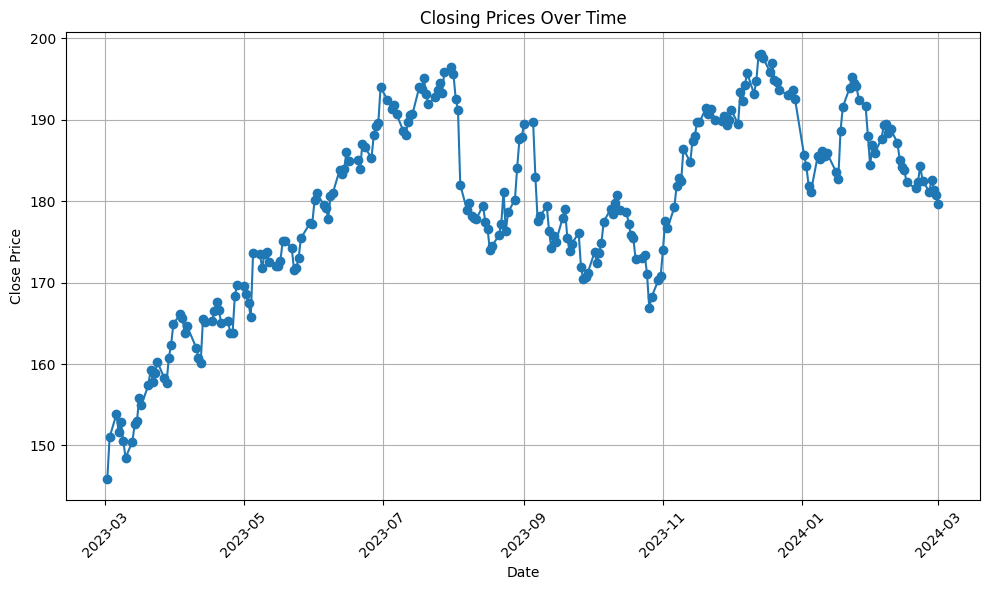

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("apple.csv")

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove the dollar sign and convert 'Close/Last' column to numeric
df['Close/Last'] = df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close/Last'], marker='o', linestyle='-')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# Get the percent return over the year
prices = df['Close/Last'].values
# reverse!
prices = prices[::-1]
# start = df['Close/Last'].iloc[-1]
# end = df['Close/Last'].iloc[0]
start = prices[0]
end = prices[-1]
percent_return = (end - start) / start * 100
print(f"The percent return over the year is {percent_return:.2f}%, going from ${start:.2f} to ${end:.2f}")

The percent return over the year is 23.13%, going from $145.91 to $179.66


In [15]:
print(prices)

[145.91  151.03  153.83  151.6   152.87  150.59  148.5   150.47  152.59
 152.99  155.85  155.    157.4   159.28  157.83  158.93  160.25  158.28
 157.65  160.77  162.36  164.9   166.17  165.63  163.76  164.66  162.03
 160.8   160.1   165.56  165.21  165.23  166.47  167.63  166.65  165.02
 165.33  163.77  163.76  168.41  169.68  169.59  168.54  167.45  165.79
 173.57  173.5   171.77  173.555 173.75  172.57  172.07  172.07  172.69
 175.05  175.16  174.2   171.56  171.84  172.99  175.43  177.3   177.25
 180.09  180.95  179.58  179.21  177.82  180.57  180.96  183.79  183.31
 183.95  186.01  184.92  185.01  183.96  187.    186.68  185.27  188.06
 189.25  189.59  193.97  192.46  191.33  191.81  190.68  188.61  188.08
 189.77  190.54  190.69  193.99  193.73  195.1   193.13  191.94  192.75
 193.62  194.5   193.22  195.83  196.45  195.605 192.58  191.17  181.99
 178.85  179.8   178.19  177.97  177.79  179.46  177.45  176.57  174.
 174.49  175.84  177.23  181.12  176.38  178.61  180.19  184.12  1

In [21]:
def scale(current, min_in, max_in, min_out, max_out):
    return (current - min_in) / (max_in - min_in) * (max_out - min_out) + min_out

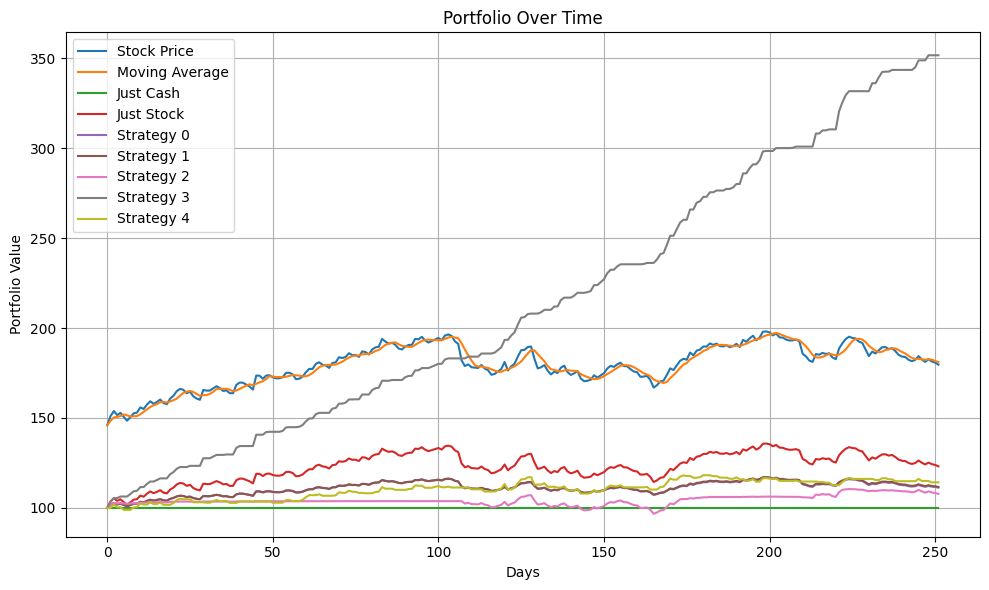

In [53]:
n = 6
cash = [50 for i in range(n)] # in dollars
stock = [50 / prices[0] for i in range(n)] # in number of shares
window_size = 5
just_cash = []
just_stock = []
my_strategies = [[] for i in range(n)]
moving_average = []
last_price = prices[0]
for i in range(len(prices)):
    sum = 0
    for j in range(min(window_size, i + 1)):
        sum += prices[i - j]
    average_price = sum / min(window_size, i + 1)
    moving_average.append(average_price)
    current_price = prices[i]
    current_portfolio = [0 for x in range(n)]
    for x in range(n):
        current_portfolio[x] = cash[x] + stock[x] * current_price # in dollars
        my_strategies[x].append(current_portfolio[x])
    just_cash.append(100)
    just_stock.append(current_price * 100 / prices[0])
    current_stock_gain = (current_price - average_price) / average_price
    stock_weight = scale(current_stock_gain, -1, 1, 1, 0)
    cash_weight = 1 - stock_weight
    # strat 1
    cash[0] = current_portfolio[0] * cash_weight
    stock[0] = current_portfolio[0] * stock_weight / current_price
    # strat 2
    stock_weight = scale(current_stock_gain, -1, 1, 0, 1)
    cash_weight = 1 - stock_weight
    cash[1] = current_portfolio[1] * cash_weight
    stock[1] = current_portfolio[1] * stock_weight / current_price
    # strat 3
    margin = 0.05
    buy_percent = 0.75
    sell_percent = 0.75
    current_stock_gain = (current_price - last_price) / average_price
    if current_stock_gain > margin:
        # stock is overvalued, sell a percent of stock
        to_sell = sell_percent * stock[2]
        cash[2] = cash[2] + to_sell * current_price
        stock[2] = stock[2] * (1 - sell_percent)
        last_price = current_price
    elif current_stock_gain < -margin:
        # stock is undervalued, spend a percent of cash on stock
        to_spend = buy_percent * cash[2]
        cash[2] = cash[2] * (1 - buy_percent)
        stock[2] = stock[2] + to_spend / current_price
        last_price = current_price
    else:
        # within the margin, dont change anything
        cash[2] = cash[2]
        stock[2] = stock[2]
    # strat 4: cheat
    # look at the next day's price
    # if it goes up, buy
    # if it goes down, sell
    tomorrow_price = prices[i + 1] if i + 1 < len(prices) else current_price
    current_portfolio = cash[3] + stock[3] * current_price
    if tomorrow_price > current_price:
        # buy
        cash[3] = 0
        stock[3] = current_portfolio / current_price
    else:
        # sell
        cash[3] = current_portfolio
        stock[3] = 0
    # strat 5: similar to strat 4, but with we try to predict tomorrow's price
    # i think tomorrow's price will grow the same amount as today did from yesterday
    tomorrow_price = current_price * (current_price / prices[max(0, i - 1)])
    current_portfolio = cash[4] + stock[4] * current_price
    if tomorrow_price > current_price:
        # buy
        cash[4] = 0
        stock[4] = current_portfolio / current_price
    else:
        # sell
        cash[4] = current_portfolio
        stock[4] = 0
    tomorrow_price = prices[i + 1] if i + 1 < len(prices) else current_price
    current_portfolio = cash[3] + stock[3] * current_price
    if tomorrow_price > current_price:
        # buy
        cash[3] = 0
        stock[3] = current_portfolio / current_price
    else:
        # sell
        cash[3] = current_portfolio
        stock[3] = 0
    # strat 6: more prediction
    tomorrow_price = current_price * (current_price / prices[max(0, i - 1)])
    current_portfolio = cash[4] + stock[4] * current_price
    if tomorrow_price > current_price:
        # buy
        cash[4] = 0
        stock[4] = current_portfolio / current_price
    else:
        # sell
        cash[4] = current_portfolio
        stock[4] = 0

# Plot the three strategies
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Stock Price')
plt.plot(moving_average, label='Moving Average')
plt.plot(just_cash, label='Just Cash')
plt.plot(just_stock, label='Just Stock')
for x in range(n):
    plt.plot(my_strategies[x], label=f"Strategy {x}")
plt.title('Portfolio Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
def get_return(margin):
    cash = 50
    stock = 50 / prices[0]
    for i in range(1, len(prices)):
        sum = 0
        for j in range(min(window_size, i + 1)):
            sum += prices[i - j]
        average_price = sum / min(window_size, i + 1)
        current_price = prices[i]
        current_portfolio = cash + stock * current_price # in dollars
        current_stock_gain = (current_price - average_price) / average_price
        # strat 3
        buy_percent = 0.5
        sell_percent = 0.5
        if current_stock_gain > margin:
            # stock is overvalued, sell a percent of stock
            to_sell = sell_percent * stock
            cash = cash + to_sell * current_price
            stock = stock * (1 - sell_percent)
        elif current_stock_gain < -margin:
            # stock is undervalued, spend a percent of cash on stock
            to_spend = buy_percent * cash
            cash = cash * (1 - buy_percent)
            stock = stock + to_spend / current_price
        else:
            # within the margin, dont change anything
            pass
    final_portfolio = cash + stock * prices[-1]
    return final_portfolio

for margin in [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
    print(f"Margin: {margin:.3f}, Final Portfolio: {get_return(margin):.2f}")

Margin: 0.001, Final Portfolio: 108.95
Margin: 0.002, Final Portfolio: 108.11
Margin: 0.003, Final Portfolio: 108.43
Margin: 0.004, Final Portfolio: 105.71
Margin: 0.005, Final Portfolio: 103.91
Margin: 0.006, Final Portfolio: 103.54
Margin: 0.007, Final Portfolio: 105.04
Margin: 0.008, Final Portfolio: 107.65
Margin: 0.009, Final Portfolio: 107.88
Margin: 0.010, Final Portfolio: 111.54
Margin: 0.020, Final Portfolio: 104.15
Margin: 0.030, Final Portfolio: 114.84
Margin: 0.040, Final Portfolio: 111.38
Margin: 0.050, Final Portfolio: 111.57
Margin: 0.060, Final Portfolio: 111.57
Margin: 0.070, Final Portfolio: 111.57
Margin: 0.080, Final Portfolio: 111.57
Margin: 0.090, Final Portfolio: 111.57
Margin: 0.100, Final Portfolio: 111.57


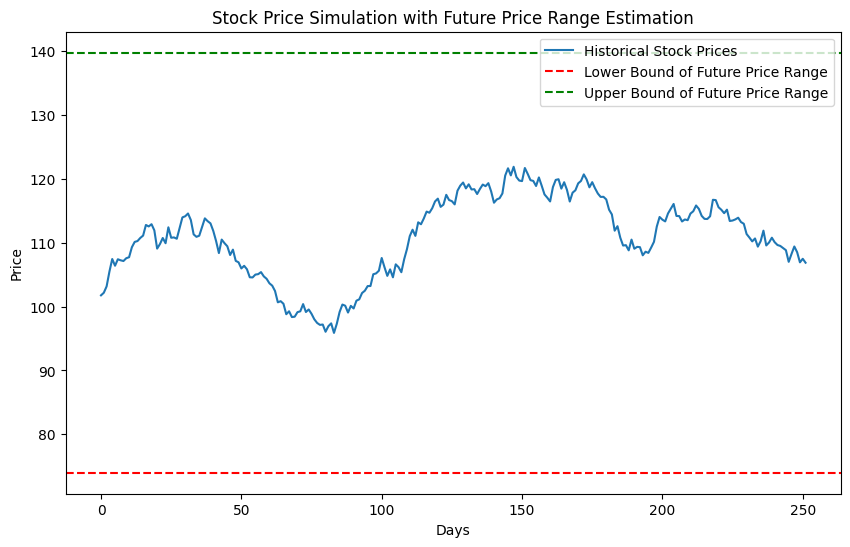

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulating stock prices
np.random.seed(0)
stock_prices = np.cumprod(1 + np.random.normal(0, 0.01, 252)) * 100  # Simulating one year of stock prices

# Calculate daily returns
daily_returns = np.diff(stock_prices) / stock_prices[:-1]

# Estimate historical volatility (annualized)
historical_volatility = np.std(daily_returns) * np.sqrt(252)

# Estimate future price range
current_price = stock_prices[-1]
confidence_level = 1.96  # Approx. 95% confidence interval
price_range = (current_price - confidence_level * historical_volatility * current_price,
               current_price + confidence_level * historical_volatility * current_price)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Historical Stock Prices')
plt.axhline(y=price_range[0], color='r', linestyle='--', label='Lower Bound of Future Price Range')
plt.axhline(y=price_range[1], color='g', linestyle='--', label='Upper Bound of Future Price Range')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Stock Price Simulation with Future Price Range Estimation')
plt.legend()
plt.show()
